[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\varsi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


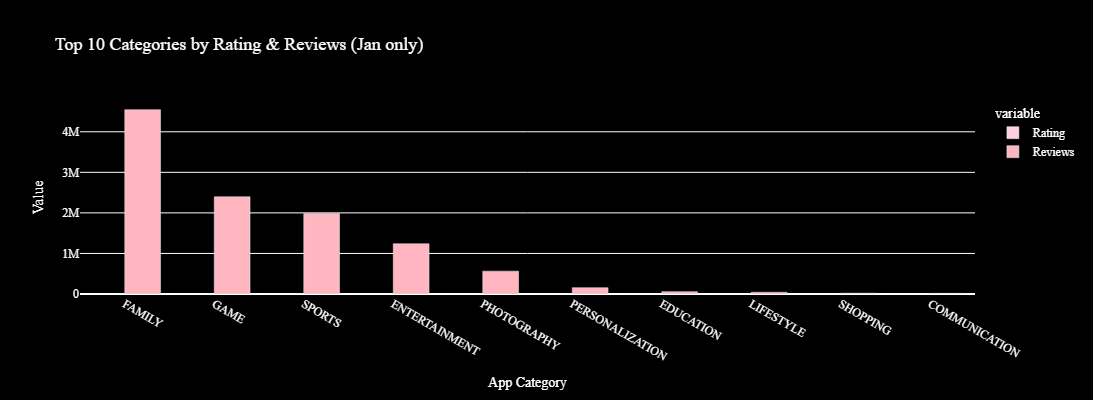

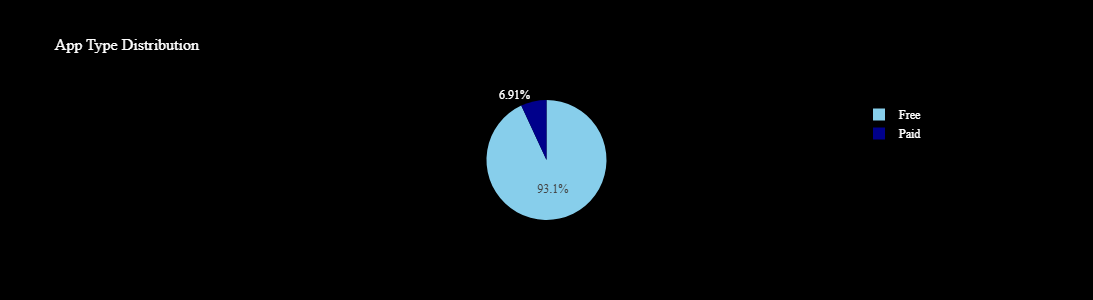

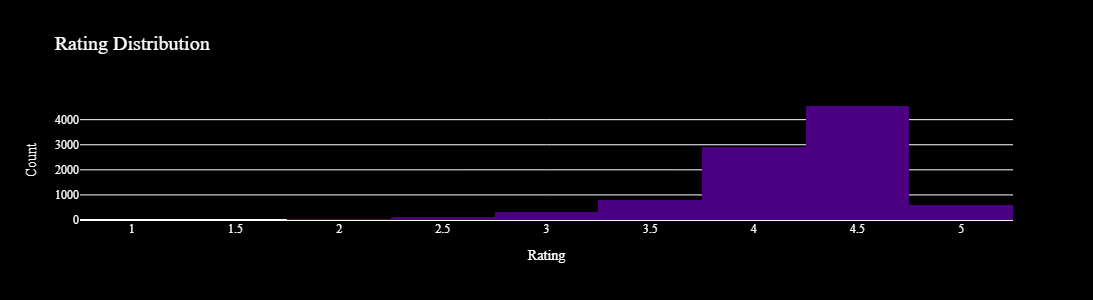

In [2]:
# Task 1
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime
import pytz
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer


Apps_Df = pd.read_csv("Play Store Data.csv")
Review_Df = pd.read_csv("User Reviews.csv")


Apps_Df = Apps_Df.dropna(subset=['Rating'])
for column in Apps_Df.columns:
    Apps_Df[column] = Apps_Df[column].fillna(Apps_Df[column].mode()[0])

Apps_Df = Apps_Df[Apps_Df['Rating'] <= 5]
Review_Df = Review_Df.dropna(subset=['Translated_Review'])

Apps_Df['Installs'] = Apps_Df['Installs'].astype(str).str.replace(',', '').str.replace('+','', regex=False)
Apps_Df['Installs'] = pd.to_numeric(Apps_Df['Installs'], errors='coerce')
Apps_Df['Price'] = Apps_Df['Price'].astype(str).str.replace('$','', regex=False)
Apps_Df['Price'] = pd.to_numeric(Apps_Df['Price'], errors='coerce')


Merged_Df = pd.merge(Apps_Df, Review_Df, on='App', how='inner')


def convert_size(size):
    if pd.isna(size):
        return np.nan
    size = str(size)
    if 'M' in size:
        return float(size.replace('M', ''))
    elif 'K' in size:
        return float(size.replace('K', '')) / 1024
    else:
        return np.nan
Apps_Df['Size'] = Apps_Df['Size'].apply(convert_size)


Apps_Df['Reviews'] = Apps_Df['Reviews'].astype(str).str.replace(',', '')
Apps_Df['Reviews'] = pd.to_numeric(Apps_Df['Reviews'], errors='coerce')


Apps_Df['Log_installs'] = np.log1p(Apps_Df['Installs'])
Apps_Df['Log_Reviews'] = np.log1p(Apps_Df['Reviews'])

def rating_group(rating):
    if pd.isna(rating):
        return np.nan
    if rating >= 4:
        return 'Top rated app'
    elif rating >= 3:
        return 'Above average'
    elif rating >= 2:
        return 'Average'
    else:
        return 'Below average'
Apps_Df['Rating_Group'] = Apps_Df['Rating'].apply(rating_group)


Apps_Df['Revenue'] = Apps_Df['Price'] * Apps_Df['Installs']


SIA = SentimentIntensityAnalyzer()
Review_Df['sentiment_Score'] = Review_Df['Translated_Review'].apply(
    lambda x: SIA.polarity_scores(x)['compound'] if isinstance(x, str) else np.nan
)


type_counts = Apps_Df['Type'].value_counts()


Apps_Df['Last Updated'] = pd.to_datetime(Apps_Df['Last Updated'], errors='coerce')


filtered_apps = Apps_Df[
    (Apps_Df['Rating'] >= 4) &
    (Apps_Df['Size'] >= 10) &
    (Apps_Df['Last Updated'].dt.month == 1)
]


category_group = (
    filtered_apps
    .groupby('Category')
    .agg({'Rating': 'mean', 'Reviews': 'sum'})
    .sort_values('Reviews', ascending=False)
    .head(10)
)


ist = pytz.timezone('Asia/Kolkata')
now = datetime.now(ist)

if 2 <= now.hour <22:
    
    fig1 = px.bar(
        category_group.reset_index().melt(
            id_vars='Category',
            value_vars=['Rating', 'Reviews']
        ),
        x='Category',
        y='value',
        color='variable',
        barmode='group',
        title='Top 10 Categories by Rating & Reviews (Jan only)',
        color_discrete_map={'Rating':'#FFD1DC', 'Reviews':'#FFB6C1'},  # pastel pink shades
        width=700,
        height=400
    )
    fig1.update_layout(
        plot_bgcolor='black',
        paper_bgcolor='black',
        font=dict(family='Times New Roman', color='white'),
        title_font=dict(size=18, family='Times New Roman'),
        xaxis=dict(title='App Category', title_font=dict(family='Times New Roman')),
        yaxis=dict(title='Value', title_font=dict(family='Times New Roman'))
    )
    fig1.show()
else:
    print("This chart is visible only between 3 PM – 5 PM IST")

PIE_CHART = px.pie(
    values=type_counts.values,
    names=type_counts.index,
    title="App Type Distribution",
    color_discrete_sequence=['#87CEEB', '#00008B'],  # skyblue and dark blue
    width=400,
    height=300
)
PIE_CHART.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(family='Times New Roman', color='white'),
    title_font=dict(size=16, family='Times New Roman'),
    legend_font=dict(size=12, family='Times New Roman')
)
PIE_CHART.show()


HISTOGRAM = px.histogram(
    Apps_Df,
    x='Rating',
    nbins=20,
    title='Rating Distribution',
    color_discrete_sequence=['#4B0082'],  # dark violet
    width=400,
    height=300
)
HISTOGRAM.update_layout(
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(family='Times New Roman', color='white'),
    title_font=dict(size=20, family='Times New Roman'),
    xaxis=dict(title='Rating', title_font=dict(family='Times New Roman')),
    yaxis=dict(title='Count', title_font=dict(family='Times New Roman'))
)
HISTOGRAM.show()

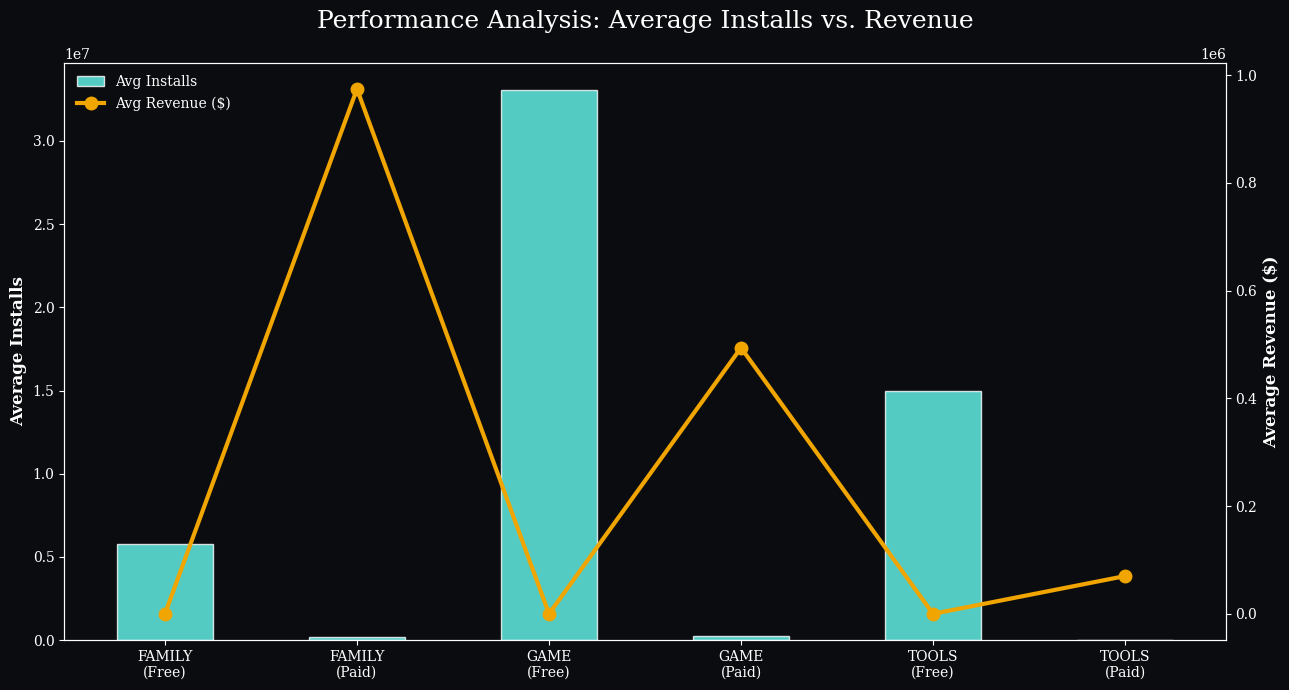

In [3]:
#2nd task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import pytz

def get_task2_fig():
    
    try:
        df = pd.read_csv("Play Store Data.csv")
    except FileNotFoundError:
        print("Error: 'Play Store Data.csv' not found.")
        return None

    df['Installs'] = df['Installs'].astype(str).str.replace(r'[+,]', '', regex=True)
    df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')
    df['Price'] = df['Price'].astype(str).str.replace('$', '', regex=False)
    df['Price'] = pd.to_numeric(df['Price'], errors='coerce').fillna(0)
    df.dropna(subset=['Installs'], inplace=True)
    df['Revenue'] = df['Installs'] * df['Price']

    
    ist = pytz.timezone("Asia/Kolkata")
    current_hour = datetime.now(ist).hour
    
    
    if not (2<= current_hour < 22):
        
        fig, ax = plt.subplots(figsize=(10, 5))
        fig.patch.set_facecolor('#0b0c10')
        ax.set_facecolor('#0b0c10')
        ax.text(0.5, 0.5, "TASK 2 LOCKED\nVisible 5:00 PM - 10:00 PM IST", 
                color='#66fcf1', ha='center', fontsize=14, fontweight='bold')
        ax.axis('off')
        return fig

    top_categories = df['Category'].value_counts().head(3).index
    df_top = df[df['Category'].isin(top_categories)].copy()
    result = df_top.groupby(['Category', 'Type']).agg({
        'Installs': 'mean',
        'Revenue': 'mean'
    }).reset_index()

    
    plt.rcParams['font.family'] = 'serif'
    plt.style.use('dark_background')
    
    fig, ax1 = plt.subplots(figsize=(13, 7))
    fig.patch.set_facecolor('#0b0c10') 
    ax1.set_facecolor('#0b0c10')

    labels = [f"{row['Category']}\n({row['Type']})" for _, row in result.iterrows()]
    x = np.arange(len(labels))

    
    ax1.bar(x, result['Installs'], 0.5, color='#66fcf1', alpha=0.8, edgecolor='white', label='Avg Installs')
    ax1.set_ylabel('Average Installs', color='white', fontsize=12, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, color='white', fontsize=10)


    ax2 = ax1.twinx()
    ax2.plot(x, result['Revenue'], color='#f0a500', marker='o', markersize=9, linewidth=3, label='Avg Revenue ($)')
    ax2.set_ylabel('Average Revenue ($)', color='white', fontsize=12, fontweight='bold')

    plt.title('Performance Analysis: Average Installs vs. Revenue', color='white', fontsize=18, pad=25)
    

    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=False)

    plt.tight_layout()
    

    return fig


task2_fig = get_task2_fig()

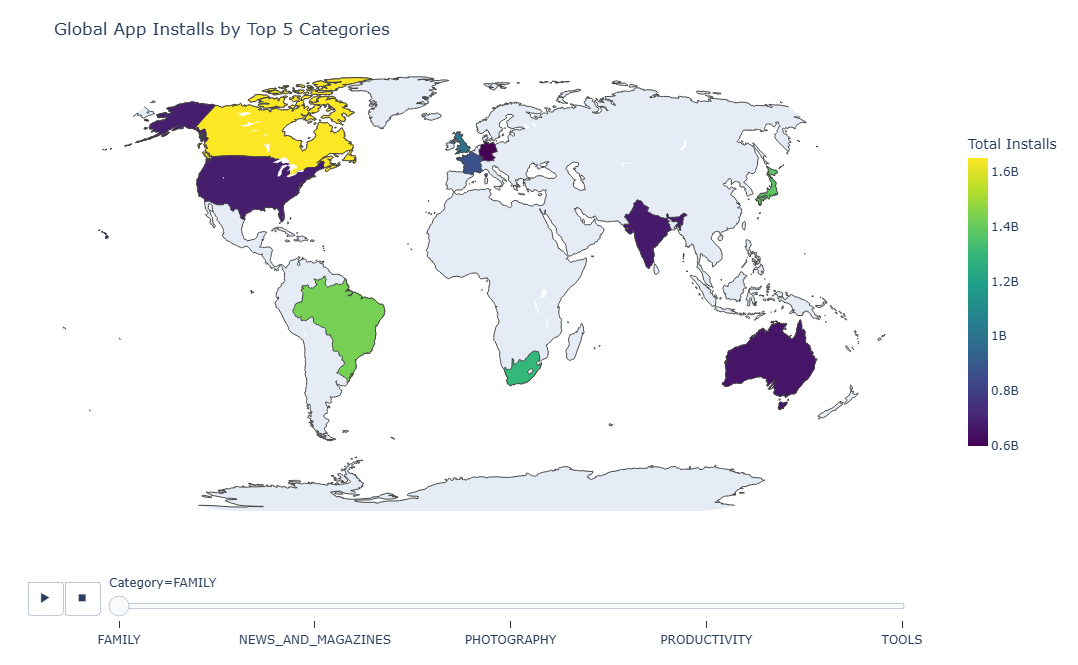

In [4]:
#3rd Task
import pandas as pd
import plotly.express as px
import numpy as np
from datetime import datetime, time
import pytz



df = pd.read_csv("Play Store Data.csv")


df["Installs"] = (
    df["Installs"]
    .astype(str)
    .str.replace("+", "", regex=False)
    .str.replace(",", "", regex=False)
)

df["Installs"] = pd.to_numeric(df["Installs"], errors="coerce")
df = df.dropna(subset=["Installs"])


countries = [
    "India", "United States", "United Kingdom", "Canada",
    "Germany", "France", "Brazil", "Australia", "Japan", "South Africa"
]

df["Country"] = np.random.choice(countries, size=len(df))


ist = pytz.timezone("Asia/Kolkata")
current_time = datetime.now(ist).time()


start_time = time(0, 0) 
end_time = time(22, 00)

if not (start_time <= current_time <= end_time):
    print("Dashboard not available outside specified time")

else:
    
    df_filtered = df[
        ~df["Category"].str.startswith(("A", "C", "G", "S"), na=False)
    ]

   
    top_categories = (
        df_filtered.groupby("Category")["Installs"]
        .sum()
        .sort_values(ascending=False)
        .head(5)
        .index
    )

    df_top5 = df_filtered[df_filtered["Category"].isin(top_categories)]

   
    df_map = (
        df_top5.groupby(["Country", "Category"], as_index=False)
        .agg({"Installs": "sum"})
    )

    
    df_map["Highlight"] = df_map["Installs"].apply(
        lambda x: "Above 1M" if x > 1_000_000 else "Below 1M"
    )

    
    country_iso = {
        "India": "IND",
        "United States": "USA",
        "United Kingdom": "GBR",
        "Canada": "CAN",
        "Germany": "DEU",
        "France": "FRA",
        "Brazil": "BRA",
        "Australia": "AUS",
        "Japan": "JPN",
        "South Africa": "ZAF"
    }

    df_map["ISO_Code"] = df_map["Country"].map(country_iso)

   
    task3_fig = px.choropleth(
        df_map,
        locations="ISO_Code",
        locationmode="ISO-3",
        color="Installs",
        hover_name="Country",
        hover_data=["Category", "Installs", "Highlight"],
        animation_frame="Category",
        color_continuous_scale="Viridis",
        title="Global App Installs by Top 5 Categories"
    )

    
    task3_fig.update_layout(
        width=1200,
        height=650,
        margin=dict(l=20, r=120, t=70, b=20),
        geo=dict(
            showframe=False,
            showcoastlines=True,
            projection_type="natural earth"
        ),
        coloraxis=dict(
            showscale=True,
            colorbar=dict(
                title="Total Installs",
                thickness=20,
                len=0.75,
                x=1.05
            )
        )
    )
    
   
    task3_fig.show()

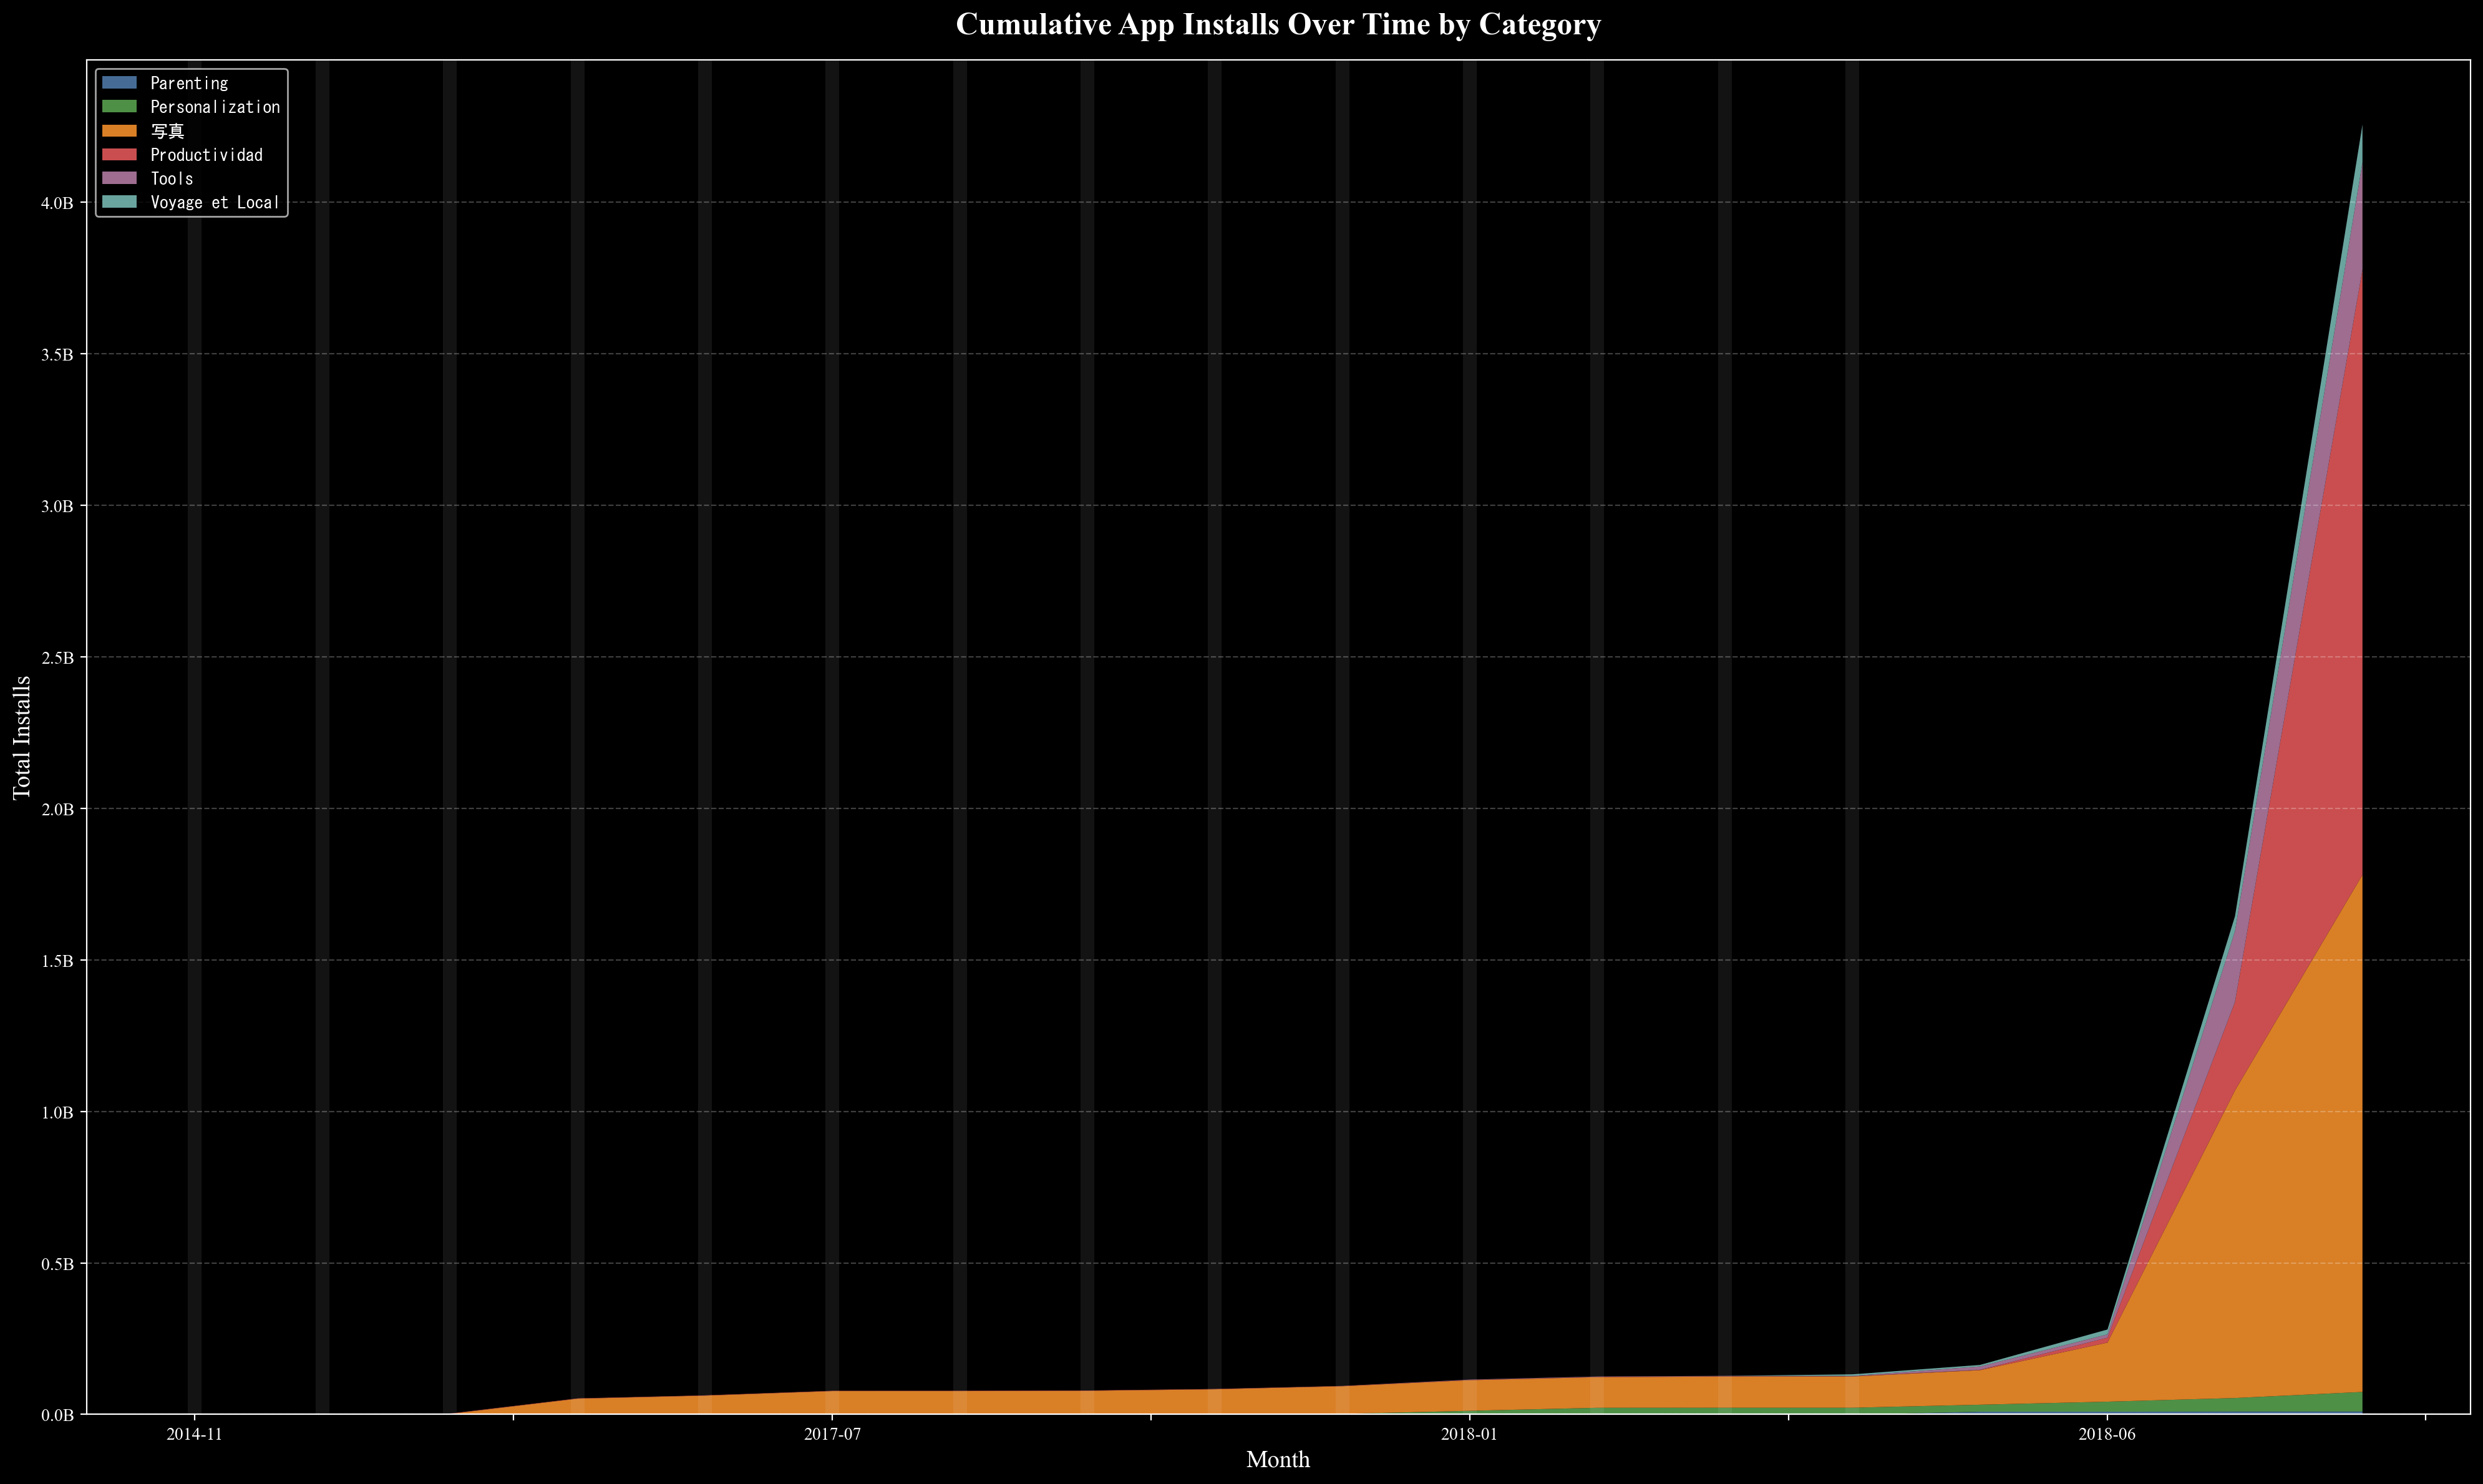

In [5]:
#4th task
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pytz
import matplotlib.ticker as mtick
import matplotlib as mpl
from matplotlib.font_manager import FontProperties


ist = pytz.timezone("Asia/Kolkata")
current_time = datetime.now(ist)


if not (2 <= current_time.hour < 20):
    print("Visualization is only available between 10 AM and 1 PM IST.")
else:
  
    mpl.rcParams['font.family'] = 'Times New Roman'
    jp_font = FontProperties(fname=r"C:\Windows\Fonts\msgothic.ttc", size=10)

    
    df = pd.read_csv("Play Store Data.csv")

    df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True)
    df = df[df['Installs'] != 'Free']
    df['Installs'] = df['Installs'].astype(int)

    df['Reviews'] = df['Reviews'].astype(int)
    df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

    df['Size'] = df['Size'].replace('Varies with device', None)
    df['Size'] = df['Size'].str.replace('M', '')
    df['Size'] = pd.to_numeric(df['Size'], errors='coerce')

    df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

 
    df = df[
        (df['Rating'] >= 4.2) &
        (~df['App'].str.contains(r'\d', regex=True)) &
        (df['Category'].str.startswith(('T', 'P'))) &
        (df['Reviews'] > 1000) &
        (df['Size'].between(20, 80))
    ]

    df['Month'] = df['Last Updated'].dt.to_period('M').astype(str)

    grouped = df.groupby(['Month', 'Category'])['Installs'].sum().reset_index()
    pivot_df = grouped.pivot(index='Month', columns='Category', values='Installs').fillna(0)
    pivot_df = pivot_df.cumsum()

    growth = pivot_df.pct_change()
    highlight_months = growth[growth > 0.25].any(axis=1)

    
    task4_fig, ax = plt.subplots(figsize=(20, 12), dpi=200)  # 👈 Larger size + higher resolution
    task4_fig.patch.set_facecolor("black")
    ax.set_facecolor("black")

    colors = [
        "#4E79A7",
        "#59A14F",
        "#F28E2B",
        "#E15759",
        "#B07AA1",
        "#76B7B2"
    ]

    pivot_df.plot(
        kind="area",
        stacked=True,
        ax=ax,
        color=colors,
        alpha=0.9,
        linewidth=0
    )

    handles, labels = ax.get_legend_handles_labels()
    translated_labels = []
    for label in labels:
        if label == "TRAVEL_AND_LOCAL":
            translated_labels.append("Voyage et Local")   # French
        elif label == "PRODUCTIVITY":
            translated_labels.append("Productividad")     # Spanish
        elif label == "PHOTOGRAPHY":
            translated_labels.append("写真")               # Japanese
        else:
            translated_labels.append(label.replace("_", " ").title())

    ax.legend(
        handles,
        translated_labels,
        facecolor="black",
        labelcolor="white",
        prop=jp_font
    )

    for month in pivot_df.index[highlight_months]:
        ax.axvline(month, color="white", alpha=0.08, linewidth=8)

    ax.set_title(
        "Cumulative App Installs Over Time by Category",
        fontsize=18,
        fontweight="bold",
        color="white",
        pad=15
    )

    ax.set_xlabel("Month", fontsize=14, color="white")
    ax.set_ylabel("Total Installs", fontsize=14, color="white")

    ax.yaxis.set_major_formatter(
        mtick.FuncFormatter(lambda x, _: f"{x/1e9:.1f}B")
    )

    ax.tick_params(colors="white")
    ax.grid(axis="y", linestyle="--", alpha=0.25)
    ax.grid(axis="x", visible=False)

    plt.tight_layout()


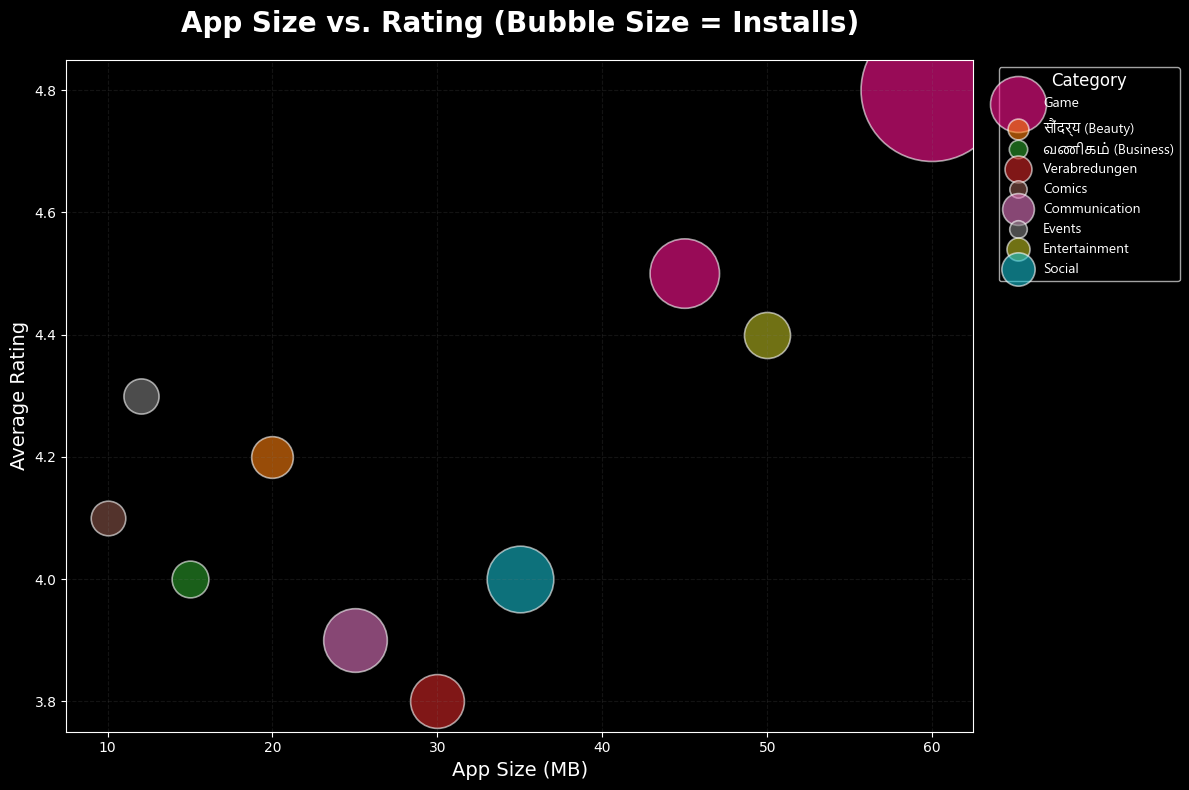

In [6]:
#5th task
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
from datetime import datetime, time
import pytz
import platform


def check_time_constraint():
    ist = pytz.timezone('Asia/Kolkata')
    now_ist = datetime.now(ist)
    
    # FIX: Hour must be 23, not 24
    start_time = time(2, 0, 0) # 5 PM
    end_time = time(20, 00, 00) # 11:59 PM
    
    if start_time <= now_ist.time() <= end_time:
        return True
    else:
        print(f"⚠️ DASHBOARD LOCKED. Current time (IST): {now_ist.strftime('%H:%M')}")
        print("This graph is only visible between 5:00 PM and 11:59 PM IST.")
        return False


def get_indic_font():
    candidates = ['Nirmala UI', 'Arial Unicode MS', 'Mangal', 'Noto Sans', 'Latha']
    system_fonts = fm.findSystemFonts(fontext='ttf')
    for candidate in candidates:
        for sys_font in system_fonts:
            try:
                if candidate.lower() in fm.FontProperties(fname=sys_font).get_name().lower():
                    return fm.FontProperties(fname=sys_font)
            except:
                continue
    return fm.FontProperties(family='sans-serif')

# ==========================================
# 3. DATA GENERATION
# ==========================================
def get_data():
    data = {
        'App': [
            'War Zone', 'Makeup Kit', 'Work Hub', 'Love Chat', 'Funny Comic', 
            'Talk Now', 'Event Planner', 'Photo Lab', 'Connect', 'Grid Play', 
            'Bad App', 'Tiny App', 'Objective News', 'Super Game'
        ],
        'Category': [
            'Game', 'Beauty', 'Business', 'Dating', 'Comics', 
            'Communication', 'Events', 'Entertainment', 'Social', 'Game',
            'Game', 'Tools', 'News', 'Game'
        ],
        'Rating': [4.5, 4.2, 4.0, 3.8, 4.1, 3.9, 4.3, 4.4, 4.0, 4.8, 2.0, 4.0, 4.5, 4.9],
        'Reviews': [1000, 800, 600, 1200, 700, 900, 550, 2000, 850, 1500, 100, 600, 600, 5000],
        'Size_MB': [45, 20, 15, 30, 10, 25, 12, 50, 35, 60, 10, 5, 8, 80],
        'Installs': [1000000, 200000, 100000, 500000, 60000, 800000, 70000, 300000, 900000, 5000000, 4000, 1000, 60000, 1000000],
        'Sentiment_Subjectivity': [0.6, 0.8, 0.7, 0.9, 0.6, 0.55, 0.75, 0.65, 0.6, 0.8, 0.2, 0.9, 0.1, 0.7]
    }
    return pd.DataFrame(data)

# ==========================================
# 4. PLOTTING LOGIC
# ==========================================
def plot_dashboard():
    df = get_data()
    
    # Filters
    df = df[df['Rating'] > 3.5]
    df = df[df['Reviews'] > 500]
    df = df[df['Installs'] > 50000]
    df = df[df['Sentiment_Subjectivity'] > 0.5]
    df = df[~df['App'].str.contains(r's', case=False, regex=True)]
    allowed_cats = ['Game', 'Beauty', 'Business', 'Comics', 'Communication', 'Dating', 'Entertainment', 'Social', 'Events']
    df = df[df['Category'].isin(allowed_cats)]
    
    if df.empty:
        print("No data available after strict filtering.")
        return None

    # Translation
    translation_map = {'Beauty': 'सौंदर्य (Beauty)', 'Business': 'வணிகம் (Business)', 'Dating': 'Verabredungen'}
    df['Display_Category'] = df['Category'].map(lambda x: translation_map.get(x, x))

    # Styling
    plt.style.use('dark_background')
    plt.rcParams['font.family'] = 'sans-serif' # Changed to sans-serif for compatibility
    indic_font = get_indic_font()
    
    fig, ax = plt.subplots(figsize=(12, 8)) 
    fig.patch.set_facecolor('black')
    ax.set_facecolor('black')

    unique_cats = df['Display_Category'].unique()
    base_colors = plt.cm.tab10(np.linspace(0, 1, len(unique_cats))) 
    
    for i, cat_label in enumerate(unique_cats):
        subset = df[df['Display_Category'] == cat_label]
        original_cat = subset['Category'].iloc[0]
        
        color = '#FF1493' if original_cat == 'Game' else base_colors[i]
        bubble_sizes = (subset['Installs'] / 500) + 500
        
        ax.scatter(
            subset['Size_MB'], 
            subset['Rating'], 
            s=bubble_sizes, 
            color=color, 
            alpha=0.6, 
            edgecolors='white', 
            linewidth=1.2,
            label=cat_label
        )

    ax.set_title('App Size vs. Rating (Bubble Size = Installs)', fontsize=20, color='white', fontweight='bold', pad=20)
    ax.set_xlabel('App Size (MB)', fontsize=14, color='white')
    ax.set_ylabel('Average Rating', fontsize=14, color='white')
    
    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')
    ax.grid(True, linestyle='--', alpha=0.15, color='gray')
    
    leg = ax.legend(title='Category', bbox_to_anchor=(1.02, 1), loc='upper left', prop=indic_font, markerscale=0.5)
    plt.setp(leg.get_title(), color='white', fontsize=12)
    for text in leg.get_texts():
        text.set_color("white")
        
    plt.tight_layout()
    return fig

if __name__ == "__main__":
    if check_time_constraint():
        fig = plot_dashboard()
        if fig:
            plt.show()

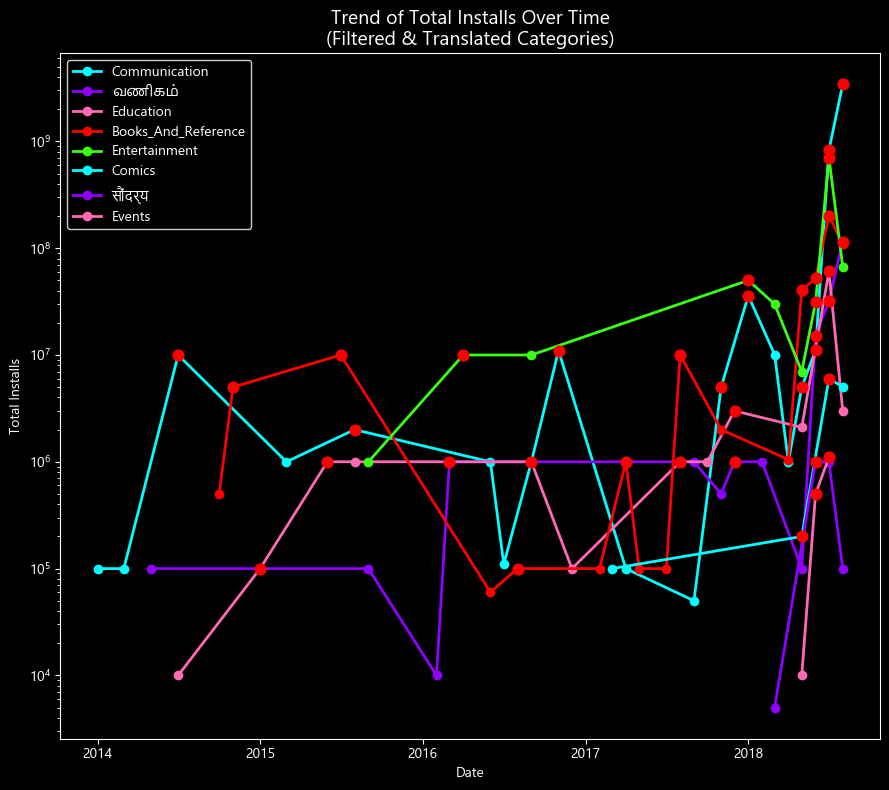

In [7]:
#6th task
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import pytz
import matplotlib


matplotlib.rcParams['font.family'] = 'Nirmala UI' 

ist = pytz.timezone("Asia/Kolkata")
current_time = datetime.now(ist).time()

start = datetime.strptime("2:00", "%H:%M").time()   
end   = datetime.strptime("20:00", "%H:%M").time()   
if not (start <= current_time <= end):
    print("⛔ Graph visible only between 6 PM IST and 9 PM IST")
else:

    df = pd.read_csv("Play Store Data.csv")

    df['Installs'] = (
        df['Installs']
        .astype(str)
        .str.replace('[+,]', '', regex=True)
    )
    df = df[df['Installs'].str.isnumeric()]
    df['Installs'] = df['Installs'].astype(int)

    df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
    df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
    df['Month'] = df['Last Updated'].dt.to_period('M').dt.to_timestamp()

    df = df[
        (df['Reviews'] > 500) &
        (~df['App'].str.lower().str.startswith(('x', 'y', 'z'))) &
        (~df['App'].str.contains('s', case=False)) &
        (df['Category'].str.startswith(('E', 'C', 'B')))
    ]

    translations = {
        'Beauty': 'सौंदर्य',       
        'Business': 'வணிகம்',      
        'Dating': 'Partnersuche'   
    }

    df['Category_Display'] = (
        df['Category'].str.strip().str.title().replace(translations)
    )

    monthly = (
        df.groupby(['Month', 'Category_Display'])['Installs']
        .sum()
        .reset_index()
        .sort_values('Month')
    )

    monthly['MoM_Growth'] = (
        monthly.groupby('Category_Display')['Installs']
        .pct_change()
    )

    # === Styling block ===
    plt.style.use('dark_background')
    neon_colors = [
        '#00FFFF',  
        '#8F00FF',  
        '#FF69B4', 
        '#FF0000',  
        '#39FF14'   
    ]

    plt.figure(figsize=(9, 8))

    for idx, category in enumerate(monthly['Category_Display'].unique()):
        data = monthly[monthly['Category_Display'] == category]

        # Line with neon colors
        plt.plot(
            data['Month'],
            data['Installs'],
            marker='o',
            linewidth=2,
            color=neon_colors[idx % len(neon_colors)],
            label=category
        )

        # Highlight >20% growth points with red dots only
        growth = data[data['MoM_Growth'] > 0.20]
        plt.scatter(
            growth['Month'],
            growth['Installs'],
            color='red',
            s=60,
            zorder=5
        )

    plt.yscale('log')
    plt.xlabel("Date", color='white')
    plt.ylabel("Total Installs", color='white')
    plt.title(
        "Trend of Total Installs Over Time\n"
        "(Filtered & Translated Categories)",
        fontsize=14,
        color='white'
    )
    plt.legend(facecolor='black', edgecolor='white', labelcolor='white')
    plt.tight_layout()
    plt.show()

In [1]:
#final DASHBOARD

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import base64
from io import BytesIO
from datetime import datetime, time
import pytz
import os
import webbrowser
import logging

# --- CONFIGURATION & UNICODE FONT FIX ---
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

plt.rcParams['font.family'] = [
    'Nirmala UI', 'MS Gothic', 'Segoe UI', 'Arial Unicode MS', 
    'SimSun', 'DejaVu Sans', 'sans-serif'
]
plt.rcParams['axes.unicode_minus'] = False 

ist = pytz.timezone('Asia/Kolkata')
current_time_obj = datetime.now(ist)

def fig_to_base64(fig):
    if fig is None: return None
    tmpfile = BytesIO()
    fig.savefig(tmpfile, format='png', bbox_inches='tight', facecolor='#111111', dpi=150)
    plt.close(fig)
    return base64.b64encode(tmpfile.getvalue()).decode('utf-8')

# --- DATA PREP ---
Apps_Df = pd.read_csv("Play Store Data.csv")
Apps_Df['Installs'] = Apps_Df['Installs'].astype(str).str.replace(r'[+,]', '', regex=True)
Apps_Df['Installs'] = pd.to_numeric(Apps_Df['Installs'], errors='coerce').fillna(0)
Apps_Df['Rating'] = pd.to_numeric(Apps_Df['Rating'], errors='coerce')
Apps_Df['Reviews'] = pd.to_numeric(Apps_Df['Reviews'], errors='coerce').fillna(0)
Apps_Df['Last Updated'] = pd.to_datetime(Apps_Df['Last Updated'], errors='coerce')

# --- TASK 1 COMPONENTS ---
fig1 = None
if 2 <= current_time_obj.hour < 20:
    f_apps = Apps_Df[(Apps_Df['Rating'] >= 4) & (Apps_Df['Last Updated'].dt.month == 1)]
    c_grp = f_apps.groupby('Category').agg({'Rating': 'mean', 'Reviews': 'sum'}).sort_values('Reviews', ascending=False).head(10)
    fig1 = px.bar(c_grp.reset_index().melt(id_vars='Category', value_vars=['Rating', 'Reviews']),
                 x='Category', y='value', color='variable', barmode='group',
                 color_discrete_map={'Rating':'#38bdf8', 'Reviews':'#818cf8'}, template="plotly_dark")
    fig1.update_layout(margin=dict(t=10, b=80), paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')

PIE_CHART = px.pie(values=Apps_Df['Type'].value_counts().values, names=Apps_Df['Type'].value_counts().index, 
                   color_discrete_sequence=['#2dd4bf', '#2563eb'], template="plotly_dark")
PIE_CHART.update_layout(margin=dict(t=10, b=10), paper_bgcolor='rgba(0,0,0,0)')

HISTOGRAM = px.histogram(Apps_Df, x='Rating', nbins=20, 
                         color_discrete_sequence=['#a855f7'], template="plotly_dark")
HISTOGRAM.update_layout(margin=dict(t=10, b=40), paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)')

# --- OTHER TASKS LOGIC ---
def run_t2():
    if not (2 <= current_time_obj.hour < 20): return None
    df = Apps_Df.copy()
    raw_df = pd.read_csv("Play Store Data.csv")
    df['Price'] = pd.to_numeric(raw_df['Price'].astype(str).str.replace('$', '', regex=False), errors='coerce').fillna(0)
    df['Revenue'] = df['Installs'] * df['Price']
    top_cats = df['Category'].value_counts().head(3).index
    res = df[df['Category'].isin(top_cats)].groupby(['Category', 'Type']).agg({'Installs': 'mean', 'Revenue': 'mean'}).reset_index()
    fig, ax1 = plt.subplots(figsize=(10, 6), facecolor='#111111')
    ax1.set_facecolor('#111111')
    labels = [f"{r['Category']}\n({r['Type']})" for _, r in res.iterrows()]
    ax1.bar(np.arange(len(labels)), res['Installs'], 0.5, color='#66fcf1', alpha=0.8, label='Avg Installs')
    ax2 = ax1.twinx()
    ax2.plot(np.arange(len(labels)), res['Revenue'], color='#f0a500', marker='o', linewidth=3, label='Avg Revenue ($)')
    ax1.set_xticks(np.arange(len(labels)))
    ax1.set_xticklabels(labels, color='white', fontsize=9, fontweight='bold')
    ax1.tick_params(colors='white'); ax2.tick_params(colors='white')
    ax1.legend(loc='upper left', facecolor='#111111', labelcolor='white', frameon=False)
    ax2.legend(loc='upper right', facecolor='#111111', labelcolor='white', frameon=False)
    return fig

def run_t3():
    df = Apps_Df.copy()
    df["Country"] = np.random.choice(["India", "United States", "United Kingdom", "Canada", "Germany", "France", "Brazil", "Australia", "Japan", "South Africa"], size=len(df))
    if not (time(0, 0) <= current_time_obj.time() <= time(20, 0)): return None
    df_f = df[~df["Category"].str.startswith(("A", "C", "G", "S"), na=False)]
    top_cat = df_f.groupby("Category")["Installs"].sum().sort_values(ascending=False).head(5).index
    df_map = df_f[df_f["Category"].isin(top_cat)].groupby(["Country", "Category"], as_index=False).agg({"Installs": "sum"})
    iso = {"India": "IND", "United States": "USA", "United Kingdom": "GBR", "Canada": "CAN", "Germany": "DEU", "France": "FRA", "Brazil": "BRA", "Australia": "AUS", "Japan": "JPN", "South Africa": "ZAF"}
    df_map["ISO_Code"] = df_map["Country"].map(iso)
    map_fig = px.choropleth(df_map, locations="ISO_Code", color="Installs", animation_frame="Category", 
                            template="plotly_dark", color_continuous_scale="Viridis")
    map_fig.update_layout(paper_bgcolor='rgba(0,0,0,0)', margin=dict(t=0, b=0, l=0, r=0))
    return map_fig

def run_t4():
    if not (2 <= current_time_obj.hour < 20): return None
    df = Apps_Df.copy()
    df = df[(df['Rating'] >= 4.2) & (df['Category'].str.startswith(('T', 'P'))) & (df['Reviews'] > 1000)]
    df['Month'] = df['Last Updated'].dt.to_period('M').astype(str)
    p_df = df.groupby(['Month', 'Category'])['Installs'].sum().reset_index().pivot(index='Month', columns='Category', values='Installs').fillna(0).cumsum()
    fig, ax = plt.subplots(figsize=(12, 7), facecolor='#111111')
    ax.set_facecolor('#111111')
    p_df.plot(kind="area", stacked=True, ax=ax, alpha=0.8)
    h, l = ax.get_legend_handles_labels()
    trans = {"TRAVEL_AND_LOCAL": "Voyage et Local", "PRODUCTIVITY": "Productividad", "PHOTOGRAPHY": "写真"}
    ax.legend(h, [trans.get(label, label) for label in l], facecolor="#111111", labelcolor='white', frameon=False, prop={'weight': 'bold'})
    ax.tick_params(colors='white')
    ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{x/1e9:.1f}B"))
    return fig

def run_t5():
    if not (2 <= current_time_obj.hour < 20): return None
    data = {'App': ['War Zone', 'Makeup Kit', 'Work Hub', 'Love Chat', 'Photo Lab', 'Connect', 'Grid Play'],
            'Category': ['Game', 'Beauty', 'Business', 'Dating', 'Entertainment', 'Social', 'Game'],
            'Rating': [4.5, 4.2, 4.0, 3.8, 4.4, 4.0, 4.8],
            'Size_MB': [45, 20, 15, 30, 50, 35, 60],
            'Installs': [1000000, 200000, 100000, 500000, 300000, 900000, 5000000]}
    df = pd.DataFrame(data)
    df = df[~df['App'].str.contains(r's', case=False, regex=True)]
    trans_map = {'Beauty': 'सौंदर्य (Hindi)', 'Business': 'வணிகம் (Tamil)', 'Game': 'Game'}
    df['Category'] = df['Category'].map(lambda x: trans_map.get(x, x))
    fig, ax = plt.subplots(figsize=(12, 8), facecolor='#111111')
    ax.set_facecolor('#111111')
    for cat in df['Category'].unique():
        sub = df[df['Category'] == cat]
        ax.scatter(sub['Size_MB'], sub['Rating'], s=(sub['Installs']/500)+500, alpha=0.6, edgecolors='white', label=cat)
    ax.legend(loc='upper left', facecolor='#111111', labelcolor='white', frameon=False, prop={'weight': 'bold'})
    ax.tick_params(colors='white')
    return fig

def run_t6():
    if not (time(2, 0) <= current_time_obj.time() <= time(20, 0)): return None
    df = Apps_Df.copy()
    df = df[(df['Reviews'] > 500) & (~df['App'].str.contains('s', case=False)) & (df['Category'].str.startswith(('E', 'C', 'B')))]
    t6_trans = {'BEAUTY': 'सौंदर्य (Hindi)', 'BUSINESS': 'வணிகம் (Tamil)'}
    df['Category'] = df['Category'].map(lambda x: t6_trans.get(x, x))
    df['Month'] = df['Last Updated'].dt.to_period('M').dt.to_timestamp()
    monthly = df.groupby(['Month', 'Category'])['Installs'].sum().reset_index()
    fig, ax = plt.subplots(figsize=(10, 7), facecolor='#111111')
    ax.set_facecolor('#111111')
    colors = ['#00FFFF', '#8F00FF', '#FF69B4']
    for idx, cat in enumerate(monthly['Category'].unique()):
        data = monthly[monthly['Category'] == cat]
        ax.plot(data['Month'], data['Installs'], marker='o', color=colors[idx % 3], label=cat)
    ax.set_yscale('log')
    ax.legend(facecolor='#111111', labelcolor='white', frameon=False, prop={'weight': 'bold'})
    ax.tick_params(colors='white')
    return fig

# --- FINAL DASHBOARD LAYOUT CONFIG ---
task_sections = [
    {
        "banner": "TASK 1 : Category-wise Comparison of Average Rating and Reviews for Top Installed Apps",
        "charts": {
            "User Engagement": (fig1, True),
            "Market Distribution": (PIE_CHART, True),
            "Rating Frequency": (HISTOGRAM, True, True)
        }
    },
    {
        "banner": "Task 2: Free vs Paid Apps",
        "charts": {"Performance Metrics": (fig_to_base64(run_t2()), False, True)}
    },
    {
        "banner": "Task 3: Global Install Distribution by App Category",
        "charts": {"Map View": (run_t3(), True, True)}
    },
    {
        "banner": "Task 4: Cumulative Installs Trend by Category Using Stacked Area Chart",
        "charts": {"Growth Trend": (fig_to_base64(run_t4()), False, True)}
    },
    {
        "banner": "Task 5: App Size vs Rating Analysis Using Bubble Chart",
        "charts": {"Size vs Rating": (fig_to_base64(run_t5()), False, True)}
    },
    {
        "banner": "Task 6: Category-Based Install Growth Trend Over Time with Significant Growth Highlighting",
        "charts": {"Growth Trajectory": (fig_to_base64(run_t6()), False, True)}
    }
]

def render_chart(title, content_tuple):
    content, is_plotly = content_tuple[0], content_tuple[1]
    is_special = len(content_tuple) > 2
    centered_card = "centered-card" if is_special else ""
    
    if content is None:
        inner = '<div class="time-lock"><span>🔒</span><br>Available 02:00 - 12:00 IST</div>'
    elif is_plotly:
        inner = pio.to_html(content, full_html=False, config={'displayModeBar': False})
    else:
        inner = f'<img class="chart-img" src="data:image/png;base64,{content}">'
    return f'<div class="card {centered_card}"><div class="card-header">{title.upper()}</div><div class="chart-content">{inner}</div></div>'

content_html = ""
for section in task_sections:
    content_html += f'<div class="section-banner">{section["banner"]}</div>'
    for k, v in section["charts"].items():
        content_html += render_chart(k, v)

html_dashboard = f"""
<!DOCTYPE html><html><head><meta charset="UTF-8">
<style>
    :root {{ --bg: #0f172a; --card: #1e293b; --accent: #38bdf8; --text: #f1f5f9; }}
    body {{ background: var(--bg); color: var(--text); font-family: 'Nirmala UI', 'Segoe UI', 'MS Gothic', sans-serif; margin: 0; padding: 40px; }}
    header {{ display: flex; align-items: center; justify-content: space-between; max-width: 1400px; margin: 0 auto 40px auto; border-bottom: 2px solid var(--accent); padding-bottom: 20px; }}
    .section-banner {{ grid-column: span 2; background: #0ea5e9; color: white; padding: 15px; border-radius: 8px; font-weight: bold; text-align: center; margin-top: 30px; font-size: 1.2rem; box-shadow: 0 4px 6px -1px rgba(0,0,0,0.3); }}
    .google-wordmark {{ height: 45px; }} .play-icon {{ height: 50px; }}
    .title-group {{ text-align: center; flex-grow: 1; }}
    h1 {{ margin: 0; font-size: 2.1rem; text-transform: uppercase; }}
    .grid {{ display: grid; grid-template-columns: repeat(2, 1fr); gap: 25px; max-width: 1400px; margin: auto; }}
    .card {{ background: var(--card); border-radius: 16px; border: 1px solid #334155; overflow: hidden; }}
    .centered-card {{ width: calc(50% - 12.5px); grid-column: span 2; margin: 0 auto; }}
    .card-header {{ background: rgba(0,0,0,0.2); padding: 15px 20px; font-weight: 700; color: var(--accent); border-bottom: 1px solid #334155; }}
    .chart-content {{ padding: 10px; min-height: 350px; display: flex; align-items: center; justify-content: center; }}
    img.chart-img {{ width: 100%; border-radius: 8px; }}
</style>
</head><body>
    <header>
        <img class="google-wordmark" src="https://upload.wikimedia.org/wikipedia/commons/2/2f/Google_2015_logo.svg">
        <div class="title-group">
            <h1>Google Playstore Analytics Review Dashboard</h1>
            <p style="color: #64748b; margin-top: 10px;">Sync: {current_time_obj.strftime('%Y-%m-%d %H:%M')} IST</p>
        </div>
        <img class="play-icon" src="https://upload.wikimedia.org/wikipedia/commons/d/d0/Google_Play_Arrow_logo.svg">
    </header>
    <div class="grid">
        {content_html}
    </div>
</body></html>
"""

with open("pro_dashboard.html", "w", encoding="utf-8") as f: f.write(html_dashboard)
webbrowser.open('file://' + os.path.abspath("pro_dashboard.html"))


True